Chloe Chen
Updated: 2/28/2023


### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helper import *

### Connect to MySQL Database

In [2]:
from connection import *

con = connect()

### TODO: why is the error popping up? doesn't affect function though

2023-03-06 13:08:24,409| ERROR   | Password is required for key /home/chloe/.ssh/id_rsa


Connection Successful


In [3]:
# test
query = "show databases;"
SQL(query, con)

,Database
0,information_schema
1,constant_therapy
2,ct_customer


In [4]:
# test
query = "test.sql"
SQL(query, con)

,Database
0,information_schema
1,constant_therapy
2,ct_customer


### Context

In [5]:
## basic info, takes about 10 secs to load, filtered preliminary
query = "context_query.sql"
context_df = SQL(query, con)

In [6]:
## TODO: processing
context_df.drop_duplicates()
context_df.head()


,id,condition_since,age_group,deficit_id,disorder_id
0,2947,10y,22-50,5,1
1,2947,10y,22-50,6,1
2,2947,10y,22-50,7,1
3,2947,10y,22-50,8,1
4,3377,2y,51-70,1,3


In [7]:
## print out basic information
print("Number of patients: ", len(pd.unique(context_df["id"])))
print("Age groups: ", pd.unique(context_df["age_group"]))
print("disorders: ", pd.unique(context_df["disorder_id"])) ## potentially filter out more diseases
print("deficits: ", pd.unique(context_df["deficit_id"])) ## potentially filter out more deficits


Number of patients:  122676
Age groups:  ['22-50' '51-70' '>70' '6-12' '13-21' None]
disorders:  [ 1  3  5  4  2  6  9  7  8 10 11]
deficits:  [ 5  6  7  8  1  2  3  4  9 10]


In [9]:
context_df.nunique()

id                 122676
condition_since         9
age_group               5
deficit_id             10
disorder_id            11
dtype: int64

In [10]:
context_df["disorder_id"].value_counts()

2     290745
3     210436
9     155004
1     154955
8     126359
5     115335
7      60135
6      49215
10     18224
4      17055
11      1390
Name: disorder_id, dtype: int64

In [13]:
context_df_disorder = context_df.groupby(["id"])["disorder_id"].apply(set).reset_index()
context_df_disorder.head()

,id,disorder_id
0,2947,{1}
1,3377,{3}
2,3509,"{1, 3}"
3,4575,{3}
4,5045,{3}


In [14]:
context_df_disorder = context_df_disorder.explode("disorder_id")
context_df_disorder.head()

,id,disorder_id
0,2947,1
1,3377,3
2,3509,1
2,3509,3
3,4575,3


<Axes: xlabel='disorder_id', ylabel='Count'>

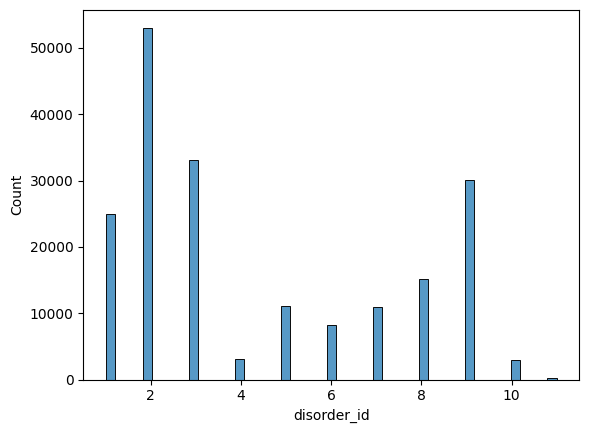

In [15]:
sns.histplot(data=context_df_disorder, x="disorder_id")

In [16]:
context_df_deficit = context_df.groupby(["id"])["deficit_id"].apply(set).reset_index()
context_df_deficit.head()

,id,deficit_id
0,2947,"{8, 5, 6, 7}"
1,3377,"{1, 2, 3, 4, 5, 6, 7, 8}"
2,3509,"{8, 2, 6}"
3,4575,"{1, 2, 3, 4, 5, 6, 8}"
4,5045,"{1, 2, 3, 4, 5, 6, 7, 8}"


In [17]:
context_df_deficit = context_df_deficit.explode("deficit_id")
context_df_deficit.head()

,id,deficit_id
0,2947,8
0,2947,5
0,2947,6
0,2947,7
1,3377,1


<Axes: xlabel='deficit_id', ylabel='Count'>

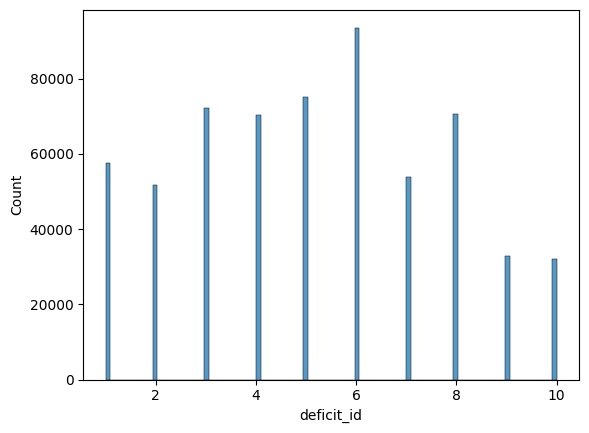

In [29]:
sns.histplot(data=context_df_deficit, x="deficit_id")

In [ ]:
## incorrect (duplicates)

# sns.histplot(data=context_df, x="disorder_id")

In [ ]:
## incorrect (duplicates)
# sns.histplot(data=context_df, x="deficit_id")

In [19]:
# given a string t in the format of n (int) + unit (unit of int, y=year, m=month), convert to number of months (int)
def time_convert(t):
    unit = t[-1]
    s = ""
    # go through the string, if it's not a digit, modify accordingly
    for c in t[:-1]:
        if not c.isdigit():
            # less than or equal, ignore the sign
            if c == ">" or c == "<":
                pass
            # a range, take the longest of the range
            elif c == "-":
                s = ""
        else:
            s += c
    n = int(s)
    if unit == "y":
        return n * 12
    else:
        return n

context_df["condition_since"] = context_df["condition_since"].apply(time_convert)

In [20]:
context_df.head()

,id,condition_since,age_group,deficit_id,disorder_id
0,2947,120,22-50,5,1
1,2947,120,22-50,6,1
2,2947,120,22-50,7,1
3,2947,120,22-50,8,1
4,3377,24,51-70,1,3


In [21]:
context_df_time = context_df.drop_duplicates(subset="id")
context_df_time.head()

,id,condition_since,age_group,deficit_id,disorder_id
0,2947,120,22-50,5,1
4,3377,24,51-70,1,3
12,3509,60,>70,2,1
18,4575,24,22-50,1,3
25,5045,24,51-70,1,3


In [26]:
print("Average time since onset: ", context_df_time["condition_since"].mean(), "month")
print("Median time since onset: ", context_df_time["condition_since"].median(), "month")
print("Mode of time since onset: ", context_df_time["condition_since"].mode(), "month")
print("Standard Deviation: ", context_df_time["condition_since"].std(), "month")

Average time since onset:  40.270688643255404 month
Median time since onset:  12.0 month
Mode of time since onset:  0    6
Name: condition_since, dtype: int64 month
Standard Deviation:  46.33821018103228 month


<Axes: >

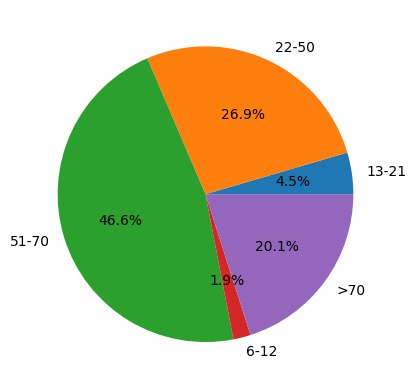

In [23]:
context_df_time.groupby("age_group").size().plot.pie(autopct='%1.1f%%')

<Axes: xlabel='condition_since'>

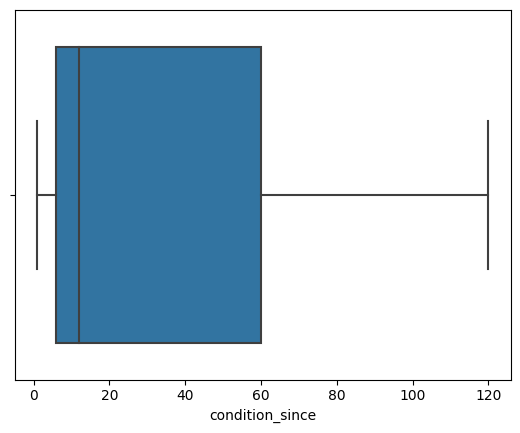

In [24]:
sns.boxplot(data=context_df_time, x="condition_since")

<Axes: xlabel='condition_since', ylabel='age_group'>

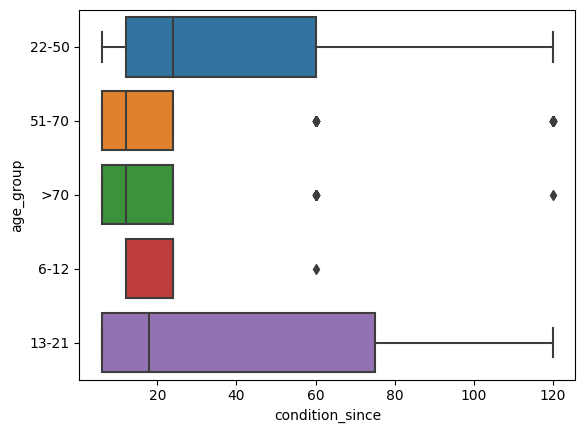

In [25]:
sns.boxplot(data=context_df_time, x="condition_since", y="age_group")

<Axes: xlabel='condition_since', ylabel='Count'>

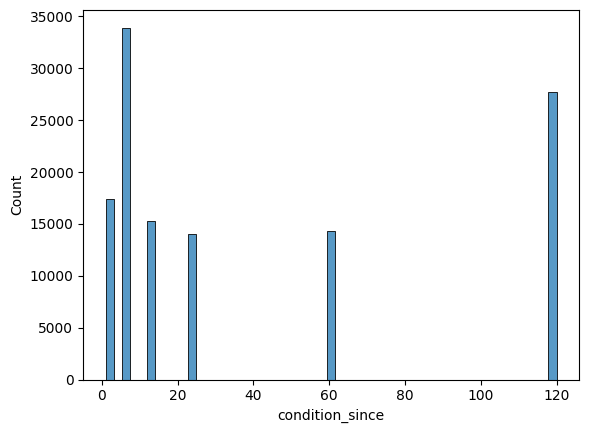

In [27]:
sns.histplot(data=context_df_time, x="condition_since")

### Basic plots

In [ ]:
query = "select * from domain_scores;"
data = SQL(query, con)

In [ ]:
domain_groups = data.groupby("domain_id")
domain_groups["baseline_domain_score"].mean().sort_values()

In [ ]:
query = "select * from before_after_v2;"
data = SQL(query, con)

In [ ]:
data["acc_diff"] = data["after_accuracy_avg"] - data["before_accuracy_avg"]
data["acc_diff"].mean()

In [ ]:
data["lat_diff"] = data["after_log_latency_avg"] - data["before_log_latency_avg"]
data["lat_diff"].mean()

In [ ]:
print(data["completed_task_count"].mean())
sns.boxplot(data = data, x = "completed_task_count")

In [ ]:
disorder_data = data.groupby("disorder_id")
disorder_data.size().plot.pie(autopct='%1.1f%%')

In [ ]:
data.head()

In [ ]:
# borrowing Claire's table for now, takes around 3.5 mins
query = "select * from q3;"
data = SQL(query, con)

In [ ]:
data.head()

In [ ]:
## current accuracy

sns.boxplot(data=data, x="accuracy")

In [ ]:
## current task levels

tl_data = data.groupby("task_level")
tl_data.size().plot.pie()